# Predicting Boston Housing Prices with Machine Learning

## Introduction

This Colab notebook is dedicated to constructing a robust machine learning model for predicting housing prices in Boston. Leveraging a dataset obtained from [Kaggle](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices), we delve into a myriad of features describing towns or suburbs in Boston. The primary goal is to train a model that can precisely forecast house prices based on these diverse features.

## Dataset Overview

Comprising 506 entries, each encapsulating a distinct Boston town or suburb, the dataset integrates 13 features for every entry, with the house price serving as the target variable. These features include crime rates, residential land proportions, business acreage, proximity to the Charles River, nitric oxide concentrations, average room counts, and more.

## Data Source

Originally part of the UCI Machine Learning Repository, the dataset is now archived [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

## Notebook Workflow

1. **Data Loading:** Import and load necessary libraries along with the Boston housing dataset.

2. **Data Exploration:** Delve into the dataset to comprehend its structure, check for missing values, and visually inspect feature distributions.

3. **Data Preprocessing:** Execute essential preprocessing steps, including handling missing values, scaling features, and encoding categorical variables.

4. **Model Building:** Split the dataset into training and testing sets, and explore the performance of different machine learning models on predicting Boston housing prices.

5. **Model Evaluation:** Rigorously assess model performance on the test set, considering crucial metrics such as Mean Squared Error (MSE), R-squared, Adjusted R-squared, and Cross-Validated R-squared.

6. **Model Comparison:** Conduct an in-depth comparison of different models, analyzing their respective R-squared, Adjusted R-squared, Cross-Validated R-squared, and Root Mean Squared Error (RMSE) metrics.

7. **Model Selection:** Strategically choose the optimal model for deployment based on comprehensive performance metrics.

8. **Prediction:** Harness the power of the selected model to make accurate predictions on new or unseen data and save the model as a pickle (pkl) file for seamless deployment.

This notebook functions as a decisive tool in the model selection process, aiding in the identification of the most effective model for predicting Boston housing prices. The chosen model can then be deployed for real-world applications, contributing to informed decision-making in the realm of real estate.

## Data Loading

Import and load the necessary libraries and the Boston housing dataset.

1. **CRIM:** Per capita crime rate by town.
2. **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS:** Proportion of non-retail business acres per town.
4. **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. **NOX:** Nitric oxides concentration (parts per 10 million).
6. **RM:** Average number of rooms per dwelling.
7. **AGE:** Proportion of owner-occupied units built prior to 1940.
8. **DIS:** Weighted distances to five Boston employment centers.
9. **RAD:** Index of accessibility to radial highways.
10. **TAX:** Full-value property-tax rate per $10,000.
11. **PTRATIO:** Pupil-teacher ratio by town.
12. **B:** \(1000(Bk - 0.63)^2\) where Bk is the proportion of blacks by town.
13. **LSTAT:** Percentage of the lower status of the population.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import pickle


%matplotlib inline

In [2]:
boston_file = 'housing.csv'

In [3]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']


In [4]:
dataset = pd.read_csv(boston_file, header=None, names=feature_names, delim_whitespace=True)


In [5]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
# Dimension of the dataset
print(np.shape(dataset))

(506, 14)


In [7]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [8]:
dataset['Price']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

## Data Preprocessing

Perform any necessary preprocessing steps, such as handling missing values, scaling features, or encoding categorical variables.

In [9]:
## Let's get all Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [10]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [11]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [12]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [14]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666.0,20.2,100.19,16.22


In [15]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)

In [17]:
X_test=scaler.transform(X_test)

In [18]:
# Getting the pkl file for processing
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [19]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [20]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

# Trying various model


### Linear regression*

In [21]:
from sklearn.linear_model import LinearRegression
regression= LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [22]:
## print the coefficients and the intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [23]:
print(regression.intercept_)

23.01581920903955


In [24]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [25]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [26]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

#### Evalution


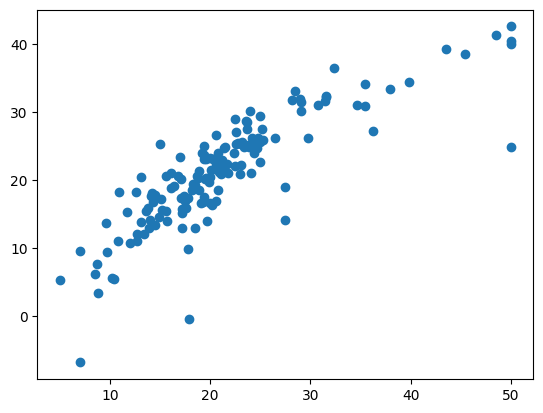

In [27]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE

    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted_R2:', round(adjusted_r2, 4) )
    print("Cross_Validated_R2: ", round(cv_score.mean(),4) )

In [29]:
ndf = [Reg_Models_Evaluation_Metrics(regression,X_train,y_train,X_test,y_test,reg_pred)]

regression_score = pd.DataFrame(data = ndf, columns=['R2_score','Adjusted_R2_Score','Cross_Validated_R2_Score','RMSE'])
regression_score.insert(0, 'Model', 'Linear Regression')
regression_score

,Model,R2_score,Adjusted_R2_Score,Cross_Validated_R2_Score,RMSE
0,Linear Regression,0.711226,0.684023,0.687535,4.63869


### RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)

RandomForest_reg.fit(X_train, y_train)
# Model making a prediction on test data
RFReg_pred = RandomForest_reg.predict(X_test)

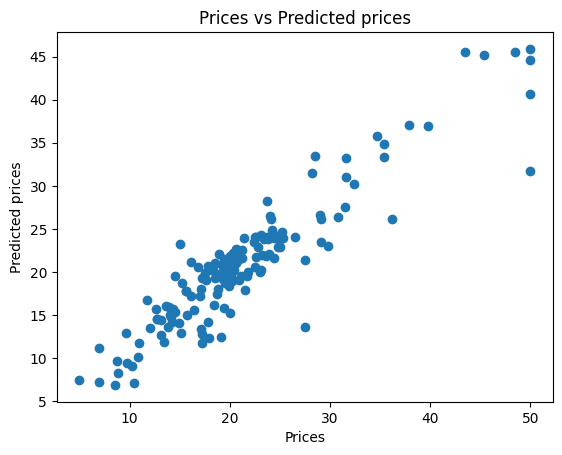

In [31]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, RFReg_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [32]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train,y_train,X_test,y_test,RFReg_pred)]

rf_score = pd.DataFrame(data = ndf, columns=['R2_score','Adjusted_R2_Score','Cross_Validated_R2_Score','RMSE'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,R2_score,Adjusted_R2_Score,Cross_Validated_R2_Score,RMSE
0,Random Forest,0.851082,0.837053,0.817514,3.33112


### XGBoost

In [33]:
from xgboost import XGBRegressor
# create an xgboost regression model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

XGBR.fit(X_train, y_train)
# Model making a prediction on test data
XGBR_pred = XGBR.predict(X_test)

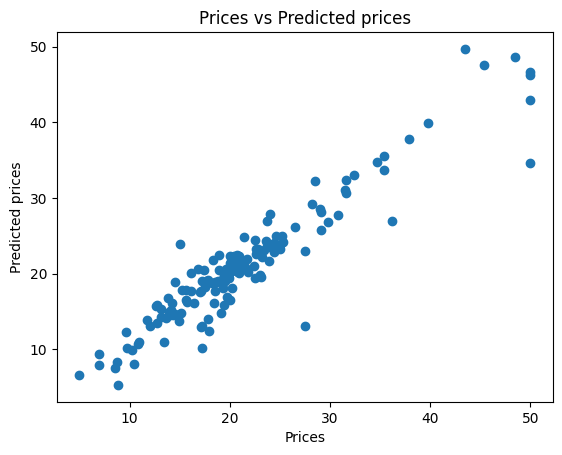

In [34]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, XGBR_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [35]:
ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train,y_train,X_test,y_test,XGBR_pred)]

XGBR_score = pd.DataFrame(data = ndf, columns=['R2_score','Adjusted_R2_Score','Cross_Validated_R2_Score','RMSE'])
XGBR_score.insert(0, 'Model', 'XGBoost')
XGBR_score

,Model,R2_score,Adjusted_R2_Score,Cross_Validated_R2_Score,RMSE
0,XGBoost,0.883526,0.872553,0.845593,2.94599


In [36]:
from sklearn.linear_model import Ridge

# Creating and training model
ridge_reg = Ridge(alpha=3, solver="cholesky")
ridge_reg.fit(X_train, y_train)
# Model making a prediction on test data
ridge_reg_pred = ridge_reg.predict(X_test)

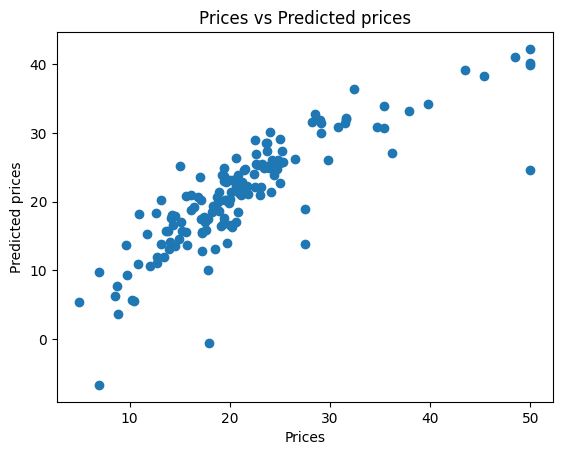

In [37]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, ridge_reg_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [38]:
ndf = [Reg_Models_Evaluation_Metrics(ridge_reg,X_train,y_train,X_test,y_test,ridge_reg_pred)]

ridge_reg_score = pd.DataFrame(data = ndf, columns=['R2_score','Adjusted_R2_Score','Cross_Validated_R2_Score','RMSE'])
ridge_reg_score.insert(0, 'Model', 'ridge_reg')
ridge_reg_score


,Model,R2_score,Adjusted_R2_Score,Cross_Validated_R2_Score,RMSE
0,ridge_reg,0.709979,0.682659,0.688547,4.648692


# Final Model Evaluation

In [39]:
predictions = pd.concat([regression_score, rf_score, XGBR_score, ridge_reg_score], ignore_index=True, sort=False)
predictions

,Model,R2_score,Adjusted_R2_Score,Cross_Validated_R2_Score,RMSE
0,Linear Regression,0.711226,0.684023,0.687535,4.638690
1,Random Forest,0.851082,0.837053,0.817514,3.331120
2,XGBoost,0.883526,0.872553,0.845593,2.945990
3,ridge_reg,0.709979,0.682659,0.688547,4.648692


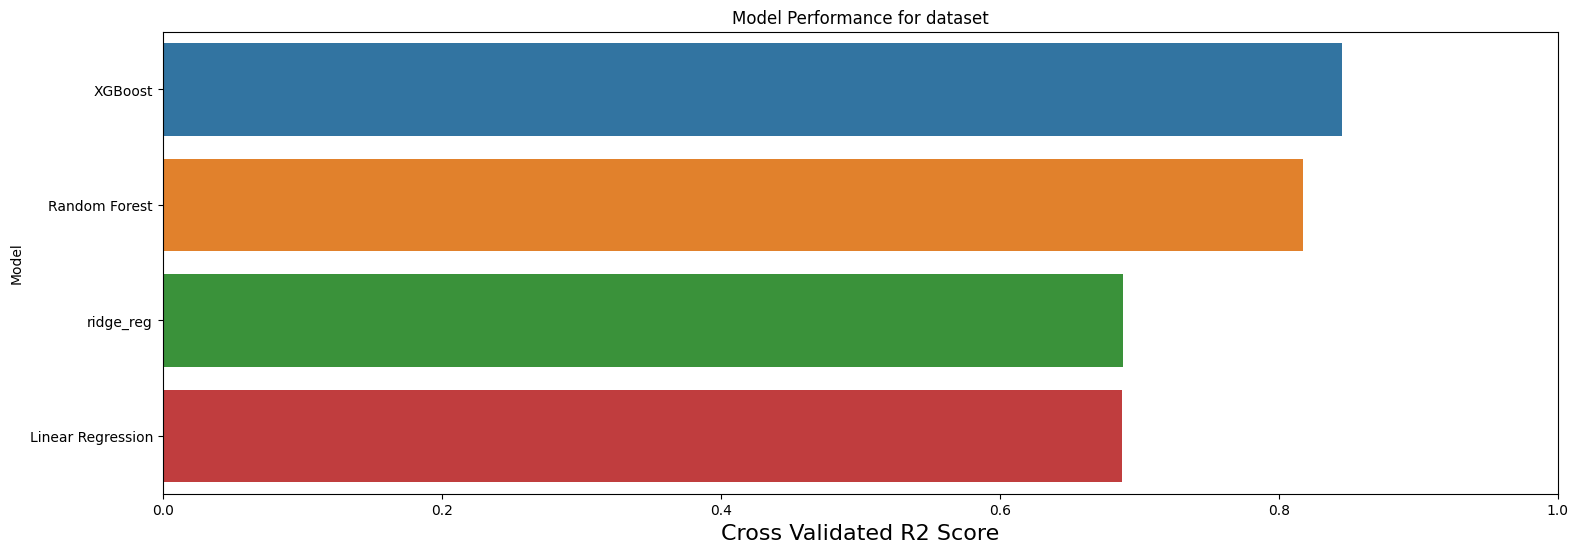

In [40]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predictions.sort_values(by=['Cross_Validated_R2_Score'], ascending=False, inplace=True)

sns.barplot(x='Cross_Validated_R2_Score', y='Model', data = predictions, ax = axe)
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

axe.set(title='Model Performance for dataset')
plt.show()

XGBoost Regression works the best among these models for our dataset.


## New Data Prediction

In [41]:
boston = pd.read_csv(boston_file, header=None, names=feature_names, delim_whitespace=True)

boston.iloc[0, :-1].values.reshape(1, -1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [42]:
##transformation of new data
scaler.transform(boston.iloc[0, :-1].values.reshape(1, -1))

/home/snl/Documents/Projects/Capstone-project2/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [43]:
XGBR.predict(scaler.transform(boston.iloc[0, :-1].values.reshape(1, -1)))

/home/snl/Documents/Projects/Capstone-project2/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([27.91079], dtype=float32)

In [44]:
regression.predict(scaler.transform(boston.iloc[0, :-1].values.reshape(1, -1)))

/home/snl/Documents/Projects/Capstone-project2/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([30.08649576])



## Pickling The best model file For deployment

In [45]:
pickle.dump(XGBR,open('XGBR.pkl','wb'))

In [46]:
pickled_model=pickle.load(open('XGBR.pkl','rb'))

In [47]:
## Prediction
pickled_model.predict(scaler.transform(boston.iloc[0, :-1].values.reshape(1, -1)))

/home/snl/Documents/Projects/Capstone-project2/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([27.91079], dtype=float32)